# Preprocessing

In [1]:
# import library
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

size of data


<h1> Brief introduction of data? What is the mean of each data properties/rows? </h1>

In [22]:
#TODO
data.columns

,Unnamed: 0,Weight,Engine power,Emission class,Engine capacity,Condition,VIN,Full service history,Price,Power,...,Consumption,Body,Warranty until,Body color,Seats,Transmission,Fuel,Range extender,Battery capacity1,Drive type
0,0,1178.0,NaN,Euro 6,1 364 ccm,Used,not published by the seller,NaN,13899,110 kW,...,5.9 l/100km (combined); 5.9 l/100km (city); 5....,Hatchback,NaN,Grey,4,Manual,Petrol,NaN,NaN,4x2
1,1,NaN,NaN,Euro 6d-TEMP,1 998 ccm,NaN,not published by the seller,NaN,38999,135 kW,...,7.2 l/100km (combined); 8.2 l/100km (city); 6....,SUV / offroad,NaN,Silver,5,Automatic,Petrol,NaN,NaN,4x4
2,2,1859.0,NaN,No emission class,NaN,Used,not published by the seller,NaN,37049,150 kW,...,15.7 kWh/100km (combined),Hatchback,NaN,Grey,5,Automatic,Electric,NaN,NaN,4x2
3,3,NaN,NaN,Euro 6,1 968 ccm,NaN,not published by the seller,NaN,45749,147 kW,...,4.4 l/100km (combined); 5.4 l/100km (city); 3....,Hatchback,NaN,Black,5,Automatic,Diesel,NaN,NaN,4x2
4,4,NaN,NaN,Euro 6,2 191 ccm,NaN,not published by the seller,NaN,21799,129 kW,...,5.4 l/100km (combined); 6.3 l/100km (city); 4....,SUV / offroad,NaN,Black,NaN,Manual,Diesel,NaN,NaN,4x4
5,5,NaN,NaN,NaN,1 984 ccm,New,not published by the seller,NaN,42349,110 kW,...,5.7 l/100km (combined),Sedans / saloons,NaN,Black,NaN,Automatic,Petrol,NaN,NaN,4x2
6,6,NaN,NaN,Euro 6,1 997 ccm,Used,not published by the seller,NaN,46799,130 kW,...,7.4 l/100km (combined),Cargo VAN,Dec-25,Black,5,Automatic,Diesel,NaN,NaN,4x2
7,7,1215.0,NaN,Euro 6,999 ccm,New,not published by the seller,NaN,24199,81 kW,...,4.8 l/100km (combined),SUV / offroad,NaN,Red,5,Manual,Petrol,NaN,NaN,4x2
8,8,NaN,NaN,Euro 6,1 968 ccm,New,not published by the seller,NaN,43349,147 kW,...,5.5 l/100km (combined),Station Wagon,NaN,NaN,5,Automatic,Diesel,NaN,NaN,4x2
9,9,1519.0,NaN,Euro 6,1 598 ccm,Demonstration car,not published by the seller,NaN,31199,96 kW,...,NaN,SUV / offroad,NaN,Red,5,Manual,Diesel,NaN,NaN,4x2



<h2> Meaning of each column </h2>

- **Unnamed: 0**: the index of original data
- **CARNAME**: name of the car
- **ID**: id of the car
- **Make**: brand that the car is made
- **Model**: model of the car
- **Body color**: body/exterior color of the car
- **Type of finish**: the paint finish or coating applied to the vehicle. 
    - Ex: Metallic finish is a type of paint that contains small metallic particles, typically aluminum flakes, which give the paint a shiny and reflective appearance.
- **Interior color**: color of the car's interior
- **Interior material**: materials used to construct the interior components of the vehicle, typically Leather,Cloth,Alcantara(high-end) 
- **Body**: body style or the overall design and structure of the vehicle (Sedan, SUV, MPV,...)
- **Doors**: number of doors on a vehicle. 4/5 means that a car has 4 main doors (two front doors and two rear doors) and a rear hatch/liftgate
- **Seats**: number of seating positions available for occupants.
- **VIN**: (Vehicle Identification Number) - A unique code assigned to every motor vehicle when it's manufactured, used for identification purposes.
- **Fuel**: the type of fuel the vehicle uses, such as gasoline, diesel, electric, hybrid, etc
- **Transmission**: The type of transmission system the vehicle has, such as automatic, manual, or semi-automatic.
- **Drive type**: Specifies whether the vehicle is front-wheel drive (FWD), rear-wheel drive (RWD), or all-wheel drive (AWD).
- **Power**:  total power output of the vehicle's engine or powertrain, often measured in horsepower (hp) or kilowatts (kW).
- **El. motor power**: The power output of the electric motor in electric or hybrid vehicles.
- **CO2 emissions**: The amount of carbon dioxide emitted by the vehicle, measured in grams per kilometer (g/km).
- **Emission class**: The vehicle's emission standard, indicating its compliance with environmental regulations.
- **Battery type**: The type of battery used in electric or hybrid vehicles, such as lithium-ion.
- **AC charging time**: The time (hour) it takes to charge the vehicle's battery using alternating current (AC).
- **DC charging time**: The time (hour) it takes to charge the vehicle's battery using direct current (DC).
- **Battery warranty (km)**: The distance (in kilometers) covered by the warranty for the vehicle's battery.
- **Range extender**:  A feature in some electric vehicles that includes a backup power source (usually a small internal combustion engine) to extend the vehicle's range.
- **Mileage**: The total distance the vehicle has traveled, often measured in miles or kilometers.
- **First registration**: The date when the vehicle was first registered.
- **Condition**: The overall state or condition of the vehicle, such as new or used.
- **Consumption**: The fuel or energy consumption of the vehicle, often expressed in liters per 100 kilometers or miles per gallon.
- **Price**: The selling price of the vehicle.
- **Currency**: The currency in which the vehicle's price is quoted.
- **Tags**: Special features/function that are equipped on the car.
- **Engine capacity**: The total volume of all the cylinders in the engine (ccm).
- **Valid MOT until**: The date until which the vehicle's Ministry of Transport (MOT) certification is valid.
- **Previous owners**: The number of individuals or entities that have owned the vehicle before the current owner.
- **Engine power**: The power output of the vehicle's electric engine.
- **Battery capacity**: The total energy storage capacity of the vehicle's battery (kWh).
- **Hybrid type**: The specific type of hybrid technology employed by the vehicle, such as parallel hybrid or series hybrid.
- **Electric range**: The distance the vehicle can travel on electric power alone.
- **Warranty until**: The date until which the vehicle is covered by a warranty.
- **Weight**: The total weight of the vehicle, often measured in kilograms or pounds.
- **Country of origin**: The country where the vehicle was manufactured.
- **Secondary drive**: Additional features related to the vehicle's drive system, such as a secondary electric motor in hybrid vehicles.
- **Energy efficiency**:  The efficiency of the vehicle in converting energy into motion.
- **Full service history**: Documentation of all the services and maintenance performed on the vehicle.
- **Battery capacity1**: The total energy storage capacity of the vehicle's battery (Ah) (Ampere-hour).

<h1> Deduplicates </h1>

In [37]:
#TODO

duplicate_rows = data[data.duplicated()]
# print duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, CARNAME, ID, Make, Model, Body color, Type of finish, Interior color, Interior material, Body, Doors, Seats, VIN, Fuel, Transmission, Drive type, Power, El. motor power, CO2 emissions, Emission class, Battery type, AC charging time, DC charging time, Battery warranty (km), Range extender, Mileage, First registration, Condition, Consumption, Price, Currency, Tags, Engine capacity, Valid MOT until, Previous owners, Engine power, Battery capacity, Hybrid type, Electric range, Warranty until, Weight, Country of origin, Secondary drive, Energy efficiency, Full service history, Battery capacity1]
Index: []

[0 rows x 46 columns]


- As we can see, there is no duplicated rows. Because we get data for different links.

# Analyzing Data in Columns
Next, we will analyze and process the data in the columns of the crawled dataset.

- First, we calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [5]:
#TODO
dtypes = raw_df.dtypes
dtypes

Unnamed: 0                 int64
Weight                   float64
Engine power              object
Emission class            object
Engine capacity           object
Condition                 object
VIN                       object
Full service history      object
Price                      int64
Power                     object
CARNAME                   object
Previous owners          float64
ID                         int64
Battery type              object
Battery warranty (km)     object
Interior color            object
Mileage                   object
Make                      object
Hybrid type               object
El. motor power           object
Model                     object
Electric range            object
Battery capacity          object
First registration        object
Doors                     object
Valid MOT until           object
Country of origin         object
Energy efficiency         object
CO2 emissions             object
Type of finish            object
Currency  

- We need to check the data in the columns of the dataset.

In [6]:
df = raw_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1099 non-null   int64  
 1   Weight                 315 non-null    float64
 2   Engine power           30 non-null     object 
 3   Emission class         1019 non-null   object 
 4   Engine capacity        981 non-null    object 
 5   Condition              722 non-null    object 
 6   VIN                    1099 non-null   object 
 7   Full service history   5 non-null      object 
 8   Price                  1099 non-null   int64  
 9   Power                  1099 non-null   object 
 10  CARNAME                1099 non-null   object 
 11  Previous owners        374 non-null    float64
 12  ID                     1099 non-null   int64  
 13  Battery type           73 non-null     object 
 14  Battery warranty (km)  46 non-null     object 
 15  Inte

- There are many columns with more than *70%* missing data, such as `Engine power`, `Full service history`, `Hybrid type`, ... Therefore, the columns with a high percentage of missing data will be removed before processing the data.

In [7]:
missing_column = ['Engine power','Full service history', 
                  'Hybrid type', 'El. motor power',
                  'Electric range', 'Valid MOT until',
                  'Energy efficiency', 'Secondary drive',
                  'Range extender','Battery capacity1']
df = df.drop(missing_column, axis = 1)

- Removing unnecessary columns:
- `Unnamedd:0`: the index number    
- `Currency`: the currency unit, which is EUR for all entries
Therefore, we will also remove these columns from the dataset.

In [8]:
df = df.drop(['Currency','Unnamed: 0'], axis = 1)

- After removing the columns with missing data and unnecessary columns, we need to process the data in the remaining columns. In this section, we will proceed with data processing in these columns.

1. What is the current data type of each column? Are there columns having inappropriate data types? If have, converting

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weight                 315 non-null    float64
 1   Emission class         1019 non-null   object 
 2   Engine capacity        981 non-null    object 
 3   Condition              722 non-null    object 
 4   VIN                    1099 non-null   object 
 5   Price                  1099 non-null   int64  
 6   Power                  1099 non-null   object 
 7   CARNAME                1099 non-null   object 
 8   Previous owners        374 non-null    float64
 9   ID                     1099 non-null   int64  
 10  Battery type           73 non-null     object 
 11  Battery warranty (km)  46 non-null     object 
 12  Interior color         866 non-null    object 
 13  Mileage                1099 non-null   object 
 14  Make                   1099 non-null   object 
 15  Mode

- There are some columns with invalid data types.
- The columns `Engine capacity`, `Power`, `Battery warranty (km)`, `Mileage`, `Battery capacity`, `CO2 emissions`, `AC charging time`, `DC charging time` and `Seats` should be converted to `int` or `float` data types instead of `string`. Therefore, we will process the data strings to convert them into numerical data types.

In [10]:
#TODO
column_convert_to_numeric = ['Engine capacity','Power', 'Consumption',
                         'Battery warranty (km)','Mileage',
                         'Battery capacity', 'CO2 emissions', 
                         'AC charging time', 'DC charging time']
def convert_to_int(column):
    for i in range(len(column)):
        value = column[i]
        if pd.notnull(value):
            column[i] = value.split(' ')[0].strip().replace('\xa0', '')
    column = pd.to_numeric(column, errors='coerce')
    return column
    
# Convert specified columns 
df[column_convert_to_numeric] = df[column_convert_to_numeric].apply(convert_to_int)
# Convert 'Seats' column 
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

In [11]:
# Rename the columns
new_column_names = {'Engine capacity': 'Engine capacity(ccm)',
                    'Price': 'Price(EUR)',
                    'Power': 'Power(kW)',
                    'Battery warranty (km)': 'Battery warranty(km)',
                    'Mileage': 'Mileage(km)',
                    'Consumption':'Consumption(l/100km or kWh/100km)',
                    'Battery capacity': 'Battery capacity(kWh)',
                    'CO2 emissions': 'CO2 emissions(g/km)',
                    'AC charging time': 'AC charging time(h)',
                    'DC charging time': 'DC charging time(min)'}
df = df.rename(columns=new_column_names)

Process the columns that store month/year data as strings to datetime: 
- First registration
- Warranty until

In [12]:
def convert_to_datetime(date_str):
    if pd.notnull(date_str):
        date_format = "%b-%y"
        date_obj = datetime.strptime(date_str, date_format)
        return date_obj
    else:
        return pd.NaT
convert_column = ['First registration', 'Warranty until']
df[convert_column] = df[convert_column].applymap(convert_to_datetime)

/tmp/ipykernel_2744/522354857.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[convert_column] = df[convert_column].applymap(convert_to_datetime)


In [13]:
# After converting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Weight                             315 non-null    float64       
 1   Emission class                     1019 non-null   object        
 2   Engine capacity(ccm)               981 non-null    float64       
 3   Condition                          722 non-null    object        
 4   VIN                                1099 non-null   object        
 5   Price(EUR)                         1099 non-null   int64         
 6   Power(kW)                          1099 non-null   int64         
 7   CARNAME                            1099 non-null   object        
 8   Previous owners                    374 non-null    float64       
 9   ID                                 1099 non-null   int64         
 10  Battery type                       7

- Now the data types of the columns are more appropriate. The next step is to examine the distribution of data in the numerical and categorical columns.

2. With each numerical column, how are values distributed?
- What is the percentage of missing values?
- Handling missing values
- Min? max? Are they abnormal?
- Missing value treatment

- Filter out the columns that contain numerical data. Calculate the missing data rate for each column.

In [14]:
numeric_df = df.select_dtypes(include=np.number)
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Weight: 71.34%
- Engine capacity(ccm): 10.74%
- Price(EUR): 0.0%
- Power(kW): 0.0%
- Previous owners: 65.97%
- ID: 0.0%
- Battery warranty(km): 95.81%
- Mileage(km): 0.0%
- Battery capacity(kWh): 92.27%
- CO2 emissions(g/km): 0.0%
- AC charging time(h): 95.09%
- DC charging time(min): 97.82%
- Consumption(l/100km or kWh/100km): 11.74%
- Seats: 10.56%


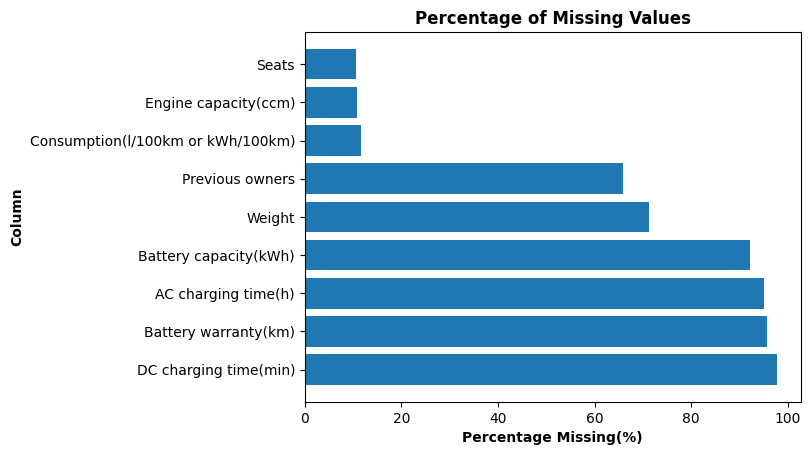

In [15]:

# Lọc các cột có giá trị thiếu lớn hơn 0
missing_percentage_filtered = missing_percentage[missing_percentage > 0].sort_values(ascending = False)
# Vẽ bar chart
plt.barh(missing_percentage_filtered.index, missing_percentage_filtered*100)

# Đặt tiêu đề
plt.title('Percentage of Missing Values', fontweight='bold')

# Đặt nhãn trục x
plt.xlabel('Percentage Missing(%)', fontweight='bold')

# Đặt nhãn trục y
plt.ylabel('Column', fontweight='bold')

# Hiển thị biểu đồ
plt.show()

- The columns `Battery warranty (km)`, `Battery capacity`, `AC charging time` và `DC charging time` have a high rate of missing data due to the fact that these attributes are only applicable to electric cars. Therefore, it is recommended to keep the data as it is in these columns.
- For the column `Previous owners`, which indicates whether the car has been previously owned or not, the missing values can be replaced with 0, assuming that the missing values correspond to cars that are brand new.
- The missing values in the columnst `Seats` and `Engine capacity`will be replaced with the median value.
- The column `Weight`  will be dropped.
- The missing data in the `Consumption` column will be filled with the mode value within each `Fuel` group.

In [16]:
df['Previous owners'] = df['Previous owners'].fillna(0)

# Xử lí missing values cột Seats
median_seats = df['Seats'].median()
df['Seats'] = df['Seats'].fillna(median_seats)

# Xử lí missing values cột Engine capacity
median_engine_capacity = df['Engine capacity(ccm)'].median()
df['Engine capacity(ccm)'] = df['Engine capacity(ccm)'].fillna(median_engine_capacity)

# Xử lí missing values cột Weight
df = df.drop('Weight', axis = 1)

# Xử lí missing values cột Consumption
df['Consumption(l/100km or kWh/100km)'] = df.groupby('Fuel')['Consumption(l/100km or kWh/100km)'].transform(lambda x: x.fillna(x.mode()[0]))

- Calculate the missing values again and save them into the `missing_percentages` variable.

In [17]:
numeric_df = df.select_dtypes(include=np.number)
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Engine capacity(ccm): 0.0%
- Price(EUR): 0.0%
- Power(kW): 0.0%
- Previous owners: 0.0%
- ID: 0.0%
- Battery warranty(km): 95.81%
- Mileage(km): 0.0%
- Battery capacity(kWh): 92.27%
- CO2 emissions(g/km): 0.0%
- AC charging time(h): 95.09%
- DC charging time(min): 97.82%
- Consumption(l/100km or kWh/100km): 0.0%
- Seats: 0.0%


- Now let's examine the distribution of data in the numerical columns. We will calculate percentiles with values of 0% (min), 25%, 50%, 75%, and 100% (max) to see how the data is distributed. The results will be saved in the `numeric_col_profile` variable.

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_col_profile = df[numeric_columns].describe().loc[["min", "25%", "50%", "75%", "max"]]
numeric_col_profile 

,Engine capacity(ccm),Price(EUR),Power(kW),Previous owners,ID,Battery warranty(km),Mileage(km),Battery capacity(kWh),CO2 emissions(g/km),AC charging time(h),DC charging time(min),Consumption(l/100km or kWh/100km),Seats
min,1.0,5399.0,33.0,0.0,61021609.0,100000.0,0.0,1.0,0.0,1.0,22.0,0.0,2.0
25%,1332.0,20474.0,85.0,0.0,61022011.5,120000.0,200.0,12.0,97.0,3.0,29.5,4.5,5.0
50%,1499.0,28399.0,107.0,0.0,61022427.0,160000.0,26788.0,16.0,117.0,4.0,32.0,5.2,5.0
75%,1968.0,41749.0,145.0,1.0,61022849.0,160000.0,62909.5,42.0,135.0,5.0,34.5,5.9,5.0
max,6496.0,394349.0,588.0,4.0,61023291.0,240000.0,174215.0,319.0,356.0,12.0,55.0,23.1,7.0


- The distribution of the numerical columns seems to be normal, except for the minimum value of the`Engine capacity(ccm)` column which appears to be a bit unusual.

With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Are they abnormal?

In [19]:
#TODO

Dữ liệu có hợp lí hay không?

In [20]:
#TODO

Outlier detection and treatment.